# Handwritten Digit Recognition

This project involves building a Convolutional Neural Network (CNN) to recognize handwritten digits from the MNIST dataset, a classic benchmark in the field of machine learning and deep learning. The MNIST dataset consists of 60,000 training images and 10,000 testing images of handwritten digits (0-9).

## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

## Loading and Preprocessing the Data

In [3]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [4]:
# Normalize the images to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# Reshape the data to add a color channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

## Building the Model

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

## Compiling the Model

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

In [11]:
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.8878 - loss: 0.3506 - val_accuracy: 0.9837 - val_loss: 0.0510
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9853 - loss: 0.0477 - val_accuracy: 0.9896 - val_loss: 0.0303
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9900 - loss: 0.0304 - val_accuracy: 0.9893 - val_loss: 0.0352
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9932 - loss: 0.0221 - val_accuracy: 0.9902 - val_loss: 0.0302
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9936 - loss: 0.0181 - val_accuracy: 0.9917 - val_loss: 0.0272


## Evaluating the Model

313/313 - 2s - 8ms/step - accuracy: 0.9917 - loss: 0.0272
Test accuracy: 0.9916999936103821


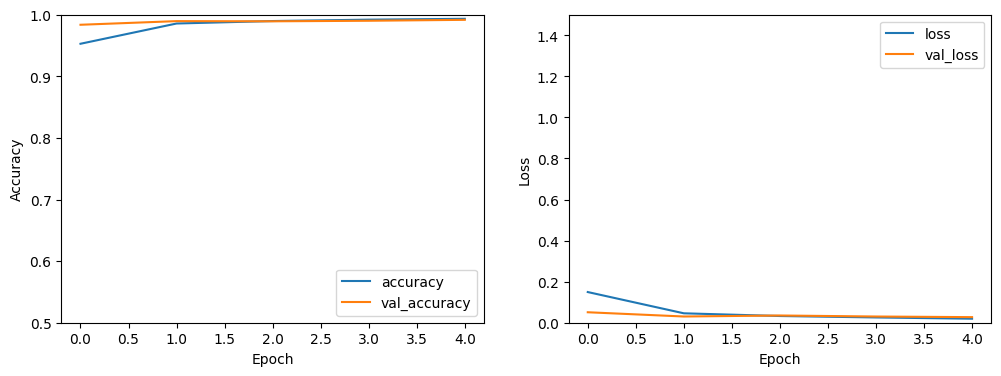

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plotting the accuracy and loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1.5])
plt.legend(loc='upper right')

plt.show()
